<a href="https://colab.research.google.com/github/sentongo-web/MASTERS_DEGREE_PROJECT_MSDS/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES FOR THE PROJECT

In [6]:
# importing libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MOUNTING THE DRIVE

In [7]:
#Mounting the drive since dataset is saved on the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#setting path for the data dictionary and the dataset
file_path = '/content/drive/My Drive/uganda_imports.xlsx'

In [9]:
#Reading the dataset and the data dictionary
data = pd.read_excel(file_path)

| Attribute           | Description                                                       |
| :------------------ | :---------------------------------------------------------------- |
| TAR_HSC_NB1         | Harmonized system commodity code (HS code)                        |
| GDS_ORG_CTY         | Country of origin (code)                                          |
| VIT_WGT_GRS         | Gross mass (including packaging)                                  |
| VIT_WGT_NET         | Net mass (excluding packaging)                                    |
| TAR_PRI             | Item price                                                        |
| VIT_CIF             | CIF (Cost, Insurance, and Freight) value in local currency        |
| TAX_AMT             | Duties and taxes amount for the item                              |
| UNIT_PRICE_LOCAL    | Unit price in local currency                                      |
| TAR_VMT             | Valuation method                                                  |
| VIT_INV_AMT_NMU     | Invoice amount in national monetary units                         |
| VIT_INV_CUR_COD     | Currency code for the invoice                                     |
| VIT_CST             | Amount of added costs in national currency                        |
| VIT_IFR_AMT_NMU     | Amount of internal freight in national currency                   |
| VIT_OTC_AMT_NMU     | Additional charges in national monetary units                     |


In [10]:
data.head(5)

,HS_Code,Country_of_Origin,Gross_Mass,Net_Mass,Item_Price,CIF_Value,Duties_Taxes,Unit_Price_Local,Valuation_Method,Invoice_Amount_NMU,Invoice_Currency_Code,Added_Costs,Internal_Freight_NMU,Additional_Charges_NMU
0,85441900.0,CN,927.72,920.43,806.92,806.92,1035.37,NaN,NaN,806.92,USD,0.0,0.0,0.0
1,69010000.0,CN,21399.86,20000.00,2366.95,2366.95,380.94,NaN,NaN,2366.95,USD,0.0,0.0,0.0
2,83023000.0,CN,77.82,50.00,308.73,308.73,74.44,NaN,NaN,308.73,USD,0.0,0.0,0.0
3,94015000.0,CN,194.54,150.00,1285.39,1285.39,447.56,257.078,NaN,1285.39,USD,0.0,0.0,0.0
4,94031000.0,CN,194.54,150.00,1344.86,1344.86,468.26,268.972,NaN,1344.86,USD,0.0,0.0,0.0


In [11]:
# sample exchange rates to UGX (assuming these are provided)
exchange_rates = {
    'USD': 3700,   # sample rate
    'EUR': 4000,   # sample rate
    # Would add other necessary exchange rates here
}

In [12]:
# Convert all monetary columns to UGX
monetary_columns = ['Item_Price', 'CIF_Value', 'Duties_Taxes', 'Unit_Price_Local',
                    'Invoice_Amount_NMU', 'Added_Costs', 'Internal_Freight_NMU', 'Additional_Charges_NMU']

In [13]:
for column in monetary_columns:
    # since VIT_INV_CUR_COD indicates the currency of the monetary columns
    data[column] = data.apply(lambda row: row[column] * exchange_rates.get(row['Invoice_Currency_Code'], 1), axis=1)

In [17]:
# Drop the currency code column as all values are now in UGX
data.drop(columns=['Added_Costs','Internal_Freight_NMU','Additional_Charges_NMU'], inplace=True)

In [18]:
data.head()

,HS_Code,Country_of_Origin,Gross_Mass,Net_Mass,Item_Price,CIF_Value,Duties_Taxes,Unit_Price_Local,Valuation_Method,Invoice_Amount_NMU
0,85441900.0,CN,927.72,920.43,2985604.0,2985604.0,3830869.0,NaN,NaN,2985604.0
1,69010000.0,CN,21399.86,20000.00,8757715.0,8757715.0,1409478.0,NaN,NaN,8757715.0
2,83023000.0,CN,77.82,50.00,1142301.0,1142301.0,275428.0,NaN,NaN,1142301.0
3,94015000.0,CN,194.54,150.00,4755943.0,4755943.0,1655972.0,951188.6,NaN,4755943.0
4,94031000.0,CN,194.54,150.00,4975982.0,4975982.0,1732562.0,995196.4,NaN,4975982.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   HS_Code             1047822 non-null  float64
 1   Country_of_Origin   1047493 non-null  object 
 2   Gross_Mass          992545 non-null   float64
 3   Net_Mass            992529 non-null   float64
 4   Item_Price          697458 non-null   float64
 5   CIF_Value           992356 non-null   float64
 6   Duties_Taxes        1031847 non-null  float64
 7   Unit_Price_Local    113 non-null      float64
 8   Valuation_Method    7 non-null        object 
 9   Invoice_Amount_NMU  992303 non-null   float64
dtypes: float64(8), object(2)
memory usage: 80.0+ MB


In [20]:
data.shape

(1048575, 10)

DATA CLEANING

In [21]:
# Check for duplicate rows in the DataFrame
duplicates = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Calculate the percentage of duplicate rows
percentage_duplicates = (num_duplicates / len(data)) * 100

# Display the result
print(f"Number of duplicate rows: {num_duplicates}")
print(f"Percentage of duplicate rows: {percentage_duplicates:.2f}%")

Number of duplicate rows: 146367
Percentage of duplicate rows: 13.96%


In [22]:
# Drop duplicate rows
if percentage_duplicates > 0:
    data_processed = data.drop_duplicates().reset_index(drop=True)
    print("Duplicate rows have been dropped.")
else:
    print("No duplicate rows found.")

Duplicate rows have been dropped.


In [23]:
# Calculate the total number of missing values
total_missing = data.isnull().sum().sum()

# Calculate the percentage of missing values relative to the entire dataset
total_cells = data.size
overall_missing_percentage = (total_missing / total_cells) * 100

# Display the result
print(f"Overall missing values: {total_missing}")
print(f"Percentage of missing values in the entire dataset: {overall_missing_percentage:.2f}%")


Overall missing values: 2691277
Percentage of missing values in the entire dataset: 25.67%


In [24]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Display the result
print("Missing values (count and percentage):")
print(pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_percentage}))

Missing values (count and percentage):
                    Missing Count  Percentage
HS_Code                       753    0.071812
Country_of_Origin            1082    0.103188
Gross_Mass                  56030    5.343442
Net_Mass                    56046    5.344968
Item_Price                 351117   33.485158
CIF_Value                   56219    5.361467
Duties_Taxes                16728    1.595308
Unit_Price_Local          1048462   99.989223
Valuation_Method          1048568   99.999332
Invoice_Amount_NMU          56272    5.366521


In [25]:
# Calculate missing value percentages for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Identify columns to drop (more than 60% missing values), excluding the target variable
columns_to_drop = [
    col for col in missing_percentage[missing_percentage > 60].index
    if col != 'Unit_Price_Local'
]

# Drop the identified columns
data_processed = data.drop(columns=columns_to_drop)
print(f"Columns dropped due to >60% missing values (excluding target): {columns_to_drop}")

# Handle missing values for the remaining columns
for column in data.columns:
    if column != 'Unit_Price_Local':  # Exclude the target variable from general imputation
        if data[column].dtype == 'float64':  # Numeric columns
            # Impute with the mean
            data[column].fillna(data[column].mean(), inplace=True)
            print(f"Numeric column '{column}' missing values filled with mean.")
        elif data[column].dtype == 'object':  # Categorical columns
            # Impute with the mode
            data[column].fillna(data[column].mode()[0], inplace=True)
            print(f"Categorical column '{column}' missing values filled with mode.")

# Retain `UNIT_PRICE_LOCAL` as-is for now, missing values will need a separate strategy
print(f"\nTarget variable 'Unit_Price_Local' retained with {data['Unit_Price_Local'].isnull().sum()} missing values.")


Columns dropped due to >60% missing values (excluding target): ['Valuation_Method']
Numeric column 'HS_Code' missing values filled with mean.
Categorical column 'Country_of_Origin' missing values filled with mode.
Numeric column 'Gross_Mass' missing values filled with mean.
Numeric column 'Net_Mass' missing values filled with mean.
Numeric column 'Item_Price' missing values filled with mean.
Numeric column 'CIF_Value' missing values filled with mean.
Numeric column 'Duties_Taxes' missing values filled with mean.
Categorical column 'Valuation_Method' missing values filled with mode.
Numeric column 'Invoice_Amount_NMU' missing values filled with mean.

Target variable 'Unit_Price_Local' retained with 1048462 missing values.


###DESCRIPTIVE STATISTICS TO DETERMINE ANY OUTLIERS FROM DATA DISTRIBUTION

In [26]:
data.describe()

,HS_Code,Gross_Mass,Net_Mass,Item_Price,CIF_Value,Duties_Taxes,Unit_Price_Local,Invoice_Amount_NMU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.130000e+02,1.048575e+06
mean,6.265497e+07,2.114804e+04,1.960712e+04,3.539403e+07,7.060577e+07,4.322340e+06,3.987162e+06,6.818797e+07
std,2.875794e+07,1.873643e+06,1.704238e+06,9.377831e+08,1.880215e+10,5.474340e+07,1.772111e+07,1.879463e+10
min,6.900000e+01,1.000000e-02,-4.500000e+03,1.000000e-02,0.000000e+00,-1.293984e+08,2.301058e-02,0.000000e+00
25%,3.819000e+07,1.000000e+02,1.000000e+02,3.700000e+05,1.894770e+05,1.428200e+04,1.119779e+04,1.628740e+05
50%,7.607110e+07,3.838400e+02,3.085400e+02,6.937500e+06,1.311391e+06,1.522180e+05,7.502158e+04,1.191844e+06
75%,8.703233e+07,1.731760e+03,1.528000e+03,3.539403e+07,1.110000e+07,1.126132e+06,4.440000e+05,9.834600e+06
max,9.940161e+07,7.826577e+08,7.624320e+08,7.264626e+11,1.428659e+13,8.696450e+09,1.558330e+08,1.428659e+13


### DETECTING OUTLIERS USING THE IQR METHOD
The Interquartile Range (IQR) method is a robust way to detect outliers.

In [32]:
# Detect outliers using the IQR method for all numeric columns
numeric_columns = data.select_dtypes(include=['float64']).columns

outliers_summary = {}

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Save summary of outliers
    outliers_summary[column] = {
        "num_outliers": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

    print(f"{column}: {len(outliers)} outliers detected.")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")

# Optional: Display the full summary of outliers for analysis
print("\nOutliers Summary:")
print(pd.DataFrame(outliers_summary).T)


HS_Code: 0 outliers detected.
Lower Bound: -35073493.5, Upper Bound: 160295822.5

Gross_Mass: 181196 outliers detected.
Lower Bound: -2347.64, Upper Bound: 4179.4

Net_Mass: 183756 outliers detected.
Lower Bound: -2042.0, Upper Bound: 3670.0

Item_Price: 37246 outliers detected.
Lower Bound: -52166038.82673383, Upper Bound: 87930064.71122304

CIF_Value: 190920 outliers detected.
Lower Bound: -16176307.5, Upper Bound: 27465784.5

Duties_Taxes: 171188 outliers detected.
Lower Bound: -1653493.0, Upper Bound: 2793907.0

Unit_Price_Local: 21 outliers detected.
Lower Bound: -638005.5357142857, Upper Bound: 1093203.3214285714

Invoice_Amount_NMU: 191872 outliers detected.
Lower Bound: -14344715.0, Upper Bound: 24342189.0


Outliers Summary:
                    num_outliers   lower_bound   upper_bound
HS_Code                      0.0 -3.507349e+07  1.602958e+08
Gross_Mass              181196.0 -2.347640e+03  4.179400e+03
Net_Mass                183756.0 -2.042000e+03  3.670000e+03
Item_Price  

TREATMENT OF OUTLIERS

In [33]:
# Define a function to trim values based on the IQR bounds
def trim_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# List of columns and their IQR bounds for trimming (updated with the new results)
outlier_bounds = {
    'HS_Code': (-3.507349e+07, 1.602958e+08),
    'Gross_Mass': (-2.347640e+03, 4.179400e+03),
    'Net_Mass': (-2.042000e+03, 3.670000e+03),
    'Item_Price': (-5.216604e+07, 8.793006e+07),
    'CIF_Value': (-1.617631e+07, 2.746578e+07),
    'Duties_Taxes': (-1.653493e+06, 2.793907e+06),
    'Unit_Price_Local': (-6.380055e+05, 1.093203e+06),
    'Invoice_Amount_NMU': (-1.434472e+07, 2.434219e+07),
}

# Trim outliers for each column based on the provided bounds
for column, (lower_bound, upper_bound) in outlier_bounds.items():
    trim_outliers(data_processed, column, lower_bound, upper_bound)

# Confirm the trimming is done by checking the summary of trimmed columns
print("Outlier trimming complete. Here is the summary of the adjusted columns:")
print(data_processed.describe())


Outlier trimming complete. Here is the summary of the adjusted columns:
            HS_Code     Gross_Mass       Net_Mass    Item_Price     CIF_Value  \
count  9.924690e+05  992466.000000  992469.000000  6.973360e+05  9.922340e+05   
mean   6.227726e+07    1031.592431     907.698205  1.099105e+07  6.281295e+06   
std    2.884002e+07    1395.897446    1240.834922  2.330539e+07  9.622268e+06   
min    6.900000e+01       0.010000   -2042.000000  1.000000e-02  0.000000e+00   
25%    3.701300e+07     100.000000     100.000000  1.213230e+05  1.676840e+05   
50%    7.323999e+07     326.090000     265.000000  9.624440e+05  1.116549e+06   
75%    8.703232e+07    1246.330000    1116.730000  6.872324e+06  7.653358e+06   
max    9.706000e+07    4179.400000    3670.000000  8.793006e+07  2.746578e+07   

       Duties_Taxes  Unit_Price_Local  Invoice_Amount_NMU  
count  9.924690e+05      9.300000e+01        9.921810e+05  
mean   7.373220e+05      2.708924e+05        5.586582e+06  
std    1.028819e+0

## confirming outliers existence with BOXPLOTS

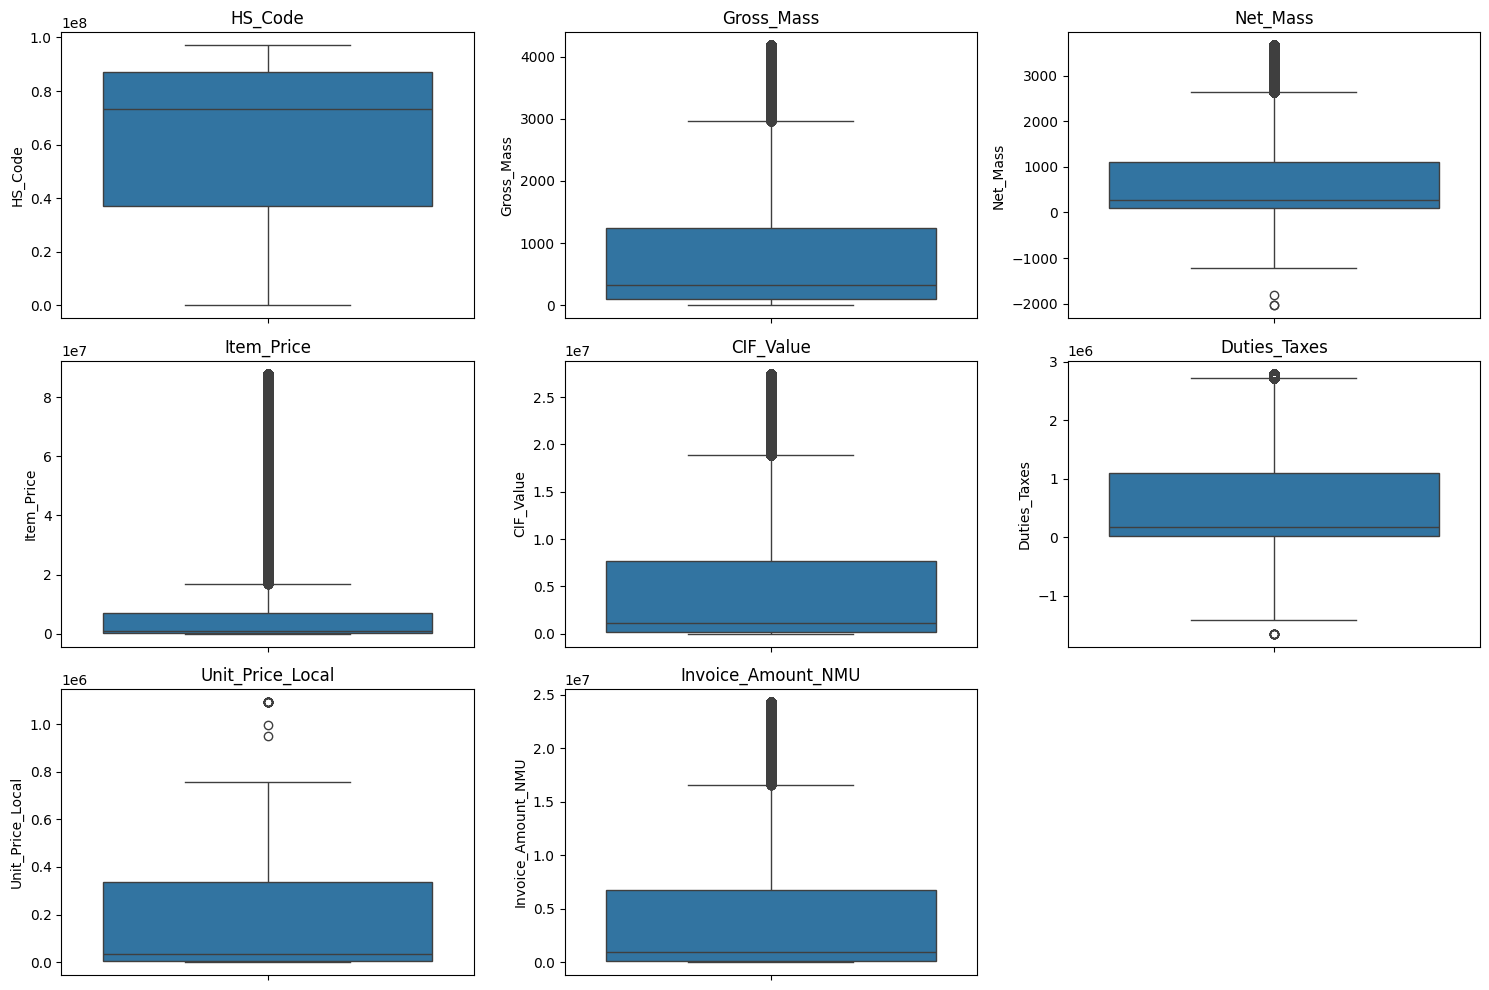

In [34]:
plt.figure(figsize=(15, 10))  # Adjusting figure size as needed
num_cols = len(data_processed.select_dtypes(include=['float64']).columns)
# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 2) // 3  # Ensure enough rows to accommodate all columns

for i, col in enumerate(data_processed.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically adjust subplot grid
    sns.boxplot(y=data_processed[col])
    plt.title(col)
    plt.tight_layout()  # Adjust spacing between subplots

plt.show()

In [36]:
# Function to calculate the number of outliers in a column
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Function to calculate the percentage of outliers in each column and overall
def calculate_outliers_percentage(df):
    total_outliers = 0
    total_values = df.size
    outliers_summary = {}

    numeric_columns = df.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        num_outliers = count_outliers(df[column])
        outliers_summary[column] = num_outliers
        total_outliers += num_outliers

    overall_percentage = (total_outliers / total_values) * 100
    outliers_summary['Overall_Percentage'] = overall_percentage
    return outliers_summary

# Assuming you have loaded your data into a dataframe named `data_processed`
outliers_summary = calculate_outliers_percentage(data_processed)

# Display the results
outliers_summary_df = pd.DataFrame(list(outliers_summary.items()), columns=['Column', 'Num_Outliers'])
print(outliers_summary_df)


               Column   Num_Outliers
0             HS_Code       0.000000
1          Gross_Mass  148605.000000
2            Net_Mass  146954.000000
3          Item_Price  109935.000000
4           CIF_Value  157463.000000
5        Duties_Taxes  156606.000000
6    Unit_Price_Local      17.000000
7  Invoice_Amount_NMU  161130.000000
8  Overall_Percentage       9.859922


In [37]:
# Define a function to trim values based on the IQR bounds
def trim_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply the trimming function to each numeric column with outliers
numeric_columns = data_processed.select_dtypes(include=['number']).columns

for column in numeric_columns:
    trim_outliers(data_processed, column)

# Confirm the trimming is done by checking the summary of the adjusted columns
print("Outlier trimming complete. Here is the summary of the adjusted columns:")
print(data_processed.describe())


Outlier trimming complete. Here is the summary of the adjusted columns:
            HS_Code     Gross_Mass       Net_Mass    Item_Price     CIF_Value  \
count  9.924690e+05  992466.000000  992469.000000  6.973360e+05  9.922340e+05   
mean   6.227726e+07     866.308449     766.488103  4.483657e+06  5.027038e+06   
std    2.884002e+07    1042.097291     942.566189  6.287879e+06  6.994790e+06   
min    6.900000e+01       0.010000   -1425.095000  1.000000e-02  0.000000e+00   
25%    3.701300e+07     100.000000     100.000000  1.213230e+05  1.676840e+05   
50%    7.323999e+07     326.090000     265.000000  9.624440e+05  1.116549e+06   
75%    8.703232e+07    1246.330000    1116.730000  6.872324e+06  7.653358e+06   
max    9.706000e+07    2965.825000    2641.825000  1.699883e+07  1.888187e+07   

       Duties_Taxes  Unit_Price_Local  Invoice_Amount_NMU  
count  9.924690e+05         93.000000        9.921810e+05  
mean   7.247009e+05     225712.771745        4.444072e+06  
std    1.003698e+0

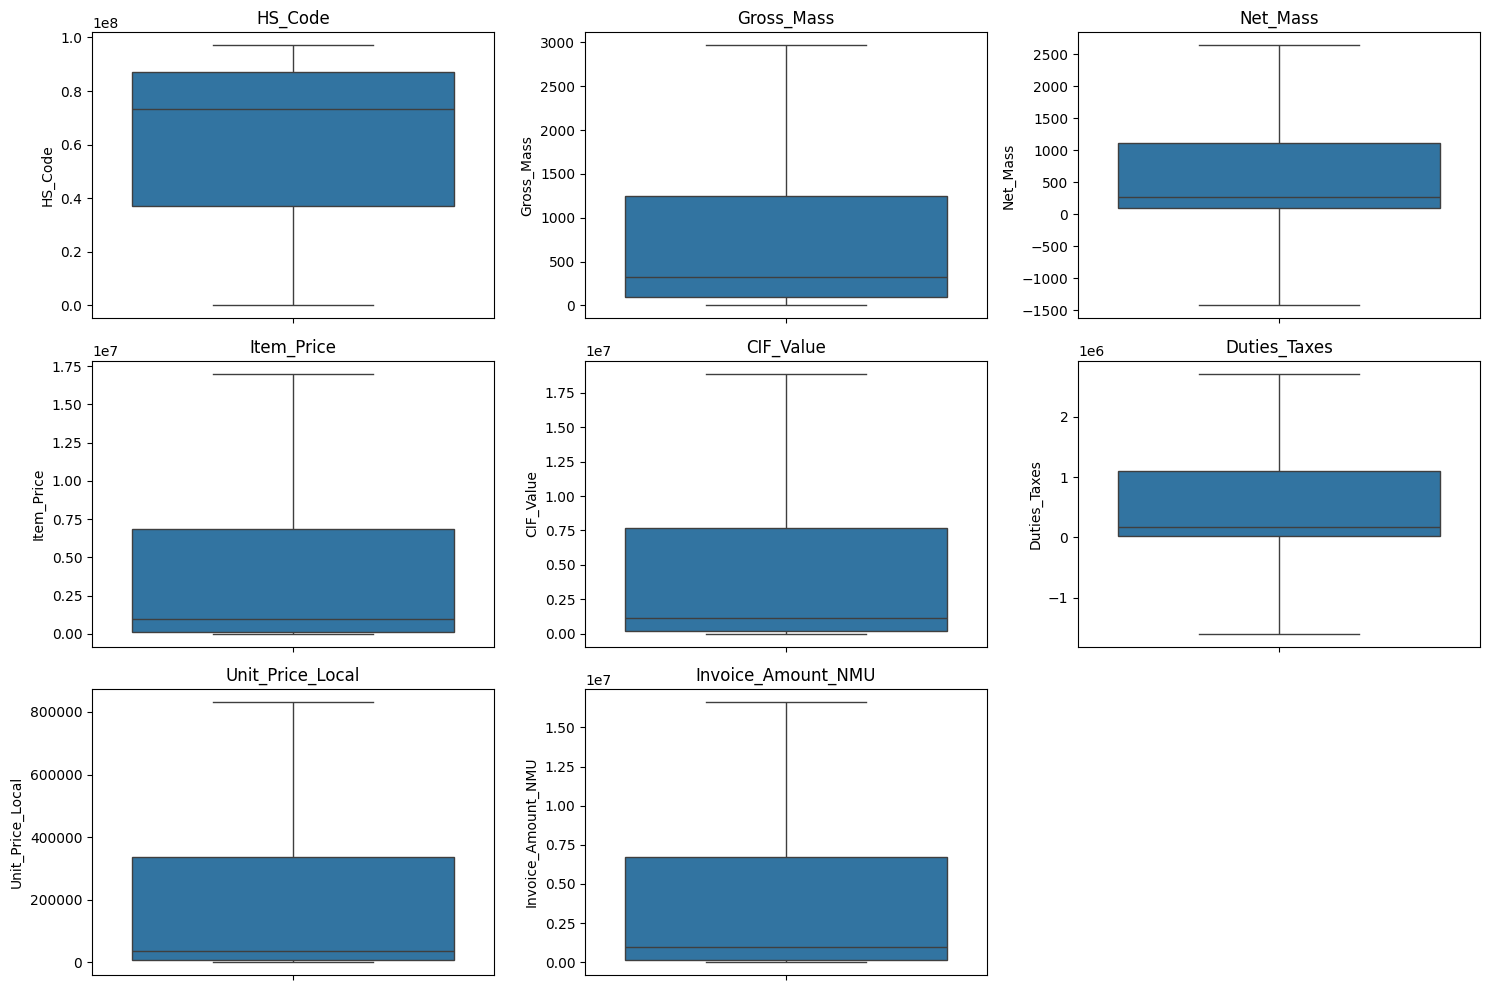

In [38]:
plt.figure(figsize=(15, 10))  # Adjusting figure size as needed
num_cols = len(data_processed.select_dtypes(include=['float64']).columns)
# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 2) // 3  # Ensure enough rows to accommodate all columns

for i, col in enumerate(data_processed.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically adjust subplot grid
    sns.boxplot(y=data_processed[col])
    plt.title(col)
    plt.tight_layout()  # Adjust spacing between subplots

plt.show()

In [40]:
data.head()

,HS_Code,Country_of_Origin,Gross_Mass,Net_Mass,Item_Price,CIF_Value,Duties_Taxes,Unit_Price_Local,Valuation_Method,Invoice_Amount_NMU
0,85441900.0,CN,927.72,920.43,2985604.0,2985604.0,3830869.0,NaN,1,2985604.0
1,69010000.0,CN,21399.86,20000.00,8757715.0,8757715.0,1409478.0,NaN,1,8757715.0
2,83023000.0,CN,77.82,50.00,1142301.0,1142301.0,275428.0,NaN,1,1142301.0
3,94015000.0,CN,194.54,150.00,4755943.0,4755943.0,1655972.0,951188.6,1,4755943.0
4,94031000.0,CN,194.54,150.00,4975982.0,4975982.0,1732562.0,995196.4,1,4975982.0


In [41]:
data.shape

(1048575, 10)